In [82]:
from tbparse import SummaryReader
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

log_dir = "C:\\Users\\di\\Documents\\BA_vivi\\Coding\\gaussian-splatting\\output\\theater_statue_r_2_it_7000_eval_test_1000"
reader = SummaryReader(log_dir)
df = reader.scalars
df.head()

,step,tag,value
0,1,iter_time,261.328888
1,2,iter_time,70.658051
2,3,iter_time,63.369217
3,4,iter_time,57.370625
4,5,iter_time,53.884930


In [83]:
print("number of different tags: " + str(df['tag'].nunique()))
print("steps with several values: " + str(df['step'].duplicated().sum()))
print("numer of different steps: " + str(df['step'].nunique()))
print("Null values: " + str(df.isna().any().any()))
df.dtypes

number of different tags: 8
steps with several values: 14035
numer of different steps: 7000
Null values: False


step       int64
tag       object
value    float64
dtype: object

In [84]:
df.tag = df.tag.astype('category')
df.dtypes

step        int64
tag      category
value     float64
dtype: object

In [85]:
# new dataframe with unique steps and tags as columns with values
df_train_metrics = df.pivot(index='step', columns='tag', values='value')
df_train_metrics.columns.name = None
df_train_metrics.index.name = "iteration"
df_train_metrics.reset_index(inplace=True)
df_train_metrics.tail()

,iteration,iter_time,test/loss_viewpoint - l1_loss,test/loss_viewpoint - psnr,total_points,train/loss_viewpoint - l1_loss,train/loss_viewpoint - psnr,train_loss_patches/l1_loss,train_loss_patches/total_loss
6995,6996,43.898880,NaN,NaN,NaN,NaN,NaN,0.057323,0.083708
6996,6997,49.258495,NaN,NaN,NaN,NaN,NaN,0.030414,0.052534
6997,6998,50.768894,NaN,NaN,NaN,NaN,NaN,0.034151,0.057864
6998,6999,50.107391,NaN,NaN,NaN,NaN,NaN,0.047008,0.083763
6999,7000,51.535873,0.051782,20.463406,1839767.0,0.044154,21.853531,0.029244,0.054305


In [86]:
# final training metrics (last iteration)
df_eval_metrics = df_train_metrics.dropna()
df_eval_metrics.drop(columns=['train_loss_patches/l1_loss', 'train_loss_patches/total_loss'], inplace=True)
df_eval_metrics.rename(columns={'iteration': 'iterations'}, inplace=True)
df_eval_metrics.insert(0, 'model', os.path.basename(log_dir))
df_eval_metrics.head()


c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,model,iterations,iter_time,test/loss_viewpoint - l1_loss,test/loss_viewpoint - psnr,total_points,train/loss_viewpoint - l1_loss,train/loss_viewpoint - psnr
999,theater_statue_r_2_it_7000_eval_test_1000,1000,24.680449,0.063136,19.343864,188883.0,0.060271,19.892591
1999,theater_statue_r_2_it_7000_eval_test_1000,2000,34.106369,0.056406,19.944225,685805.0,0.051099,20.816296
2999,theater_statue_r_2_it_7000_eval_test_1000,3000,40.545280,0.053888,20.231491,1136470.0,0.049859,21.066908
3999,theater_statue_r_2_it_7000_eval_test_1000,4000,40.286209,0.054350,20.115599,1281383.0,0.048181,21.260086
4999,theater_statue_r_2_it_7000_eval_test_1000,5000,46.287872,0.052723,20.314236,1668543.0,0.045669,21.640558


In [87]:
# drop columns with NaN values
df_train_metrics.dropna(axis=1, how='any', inplace=True)
df_train_metrics.tail()

,iteration,iter_time,train_loss_patches/l1_loss,train_loss_patches/total_loss
6995,6996,43.898880,0.057323,0.083708
6996,6997,49.258495,0.030414,0.052534
6997,6998,50.768894,0.034151,0.057864
6998,6999,50.107391,0.047008,0.083763
6999,7000,51.535873,0.029244,0.054305


In [88]:
#export training metrics as csv

export_folder = log_dir + "/eval"
os.makedirs(log_dir + "/eval", exist_ok=True)

df_train_metrics.to_csv(export_folder + '/training_process.csv', index=False)
df_eval_metrics.to_csv(export_folder + '/eval_metrics.csv', index=False)

c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


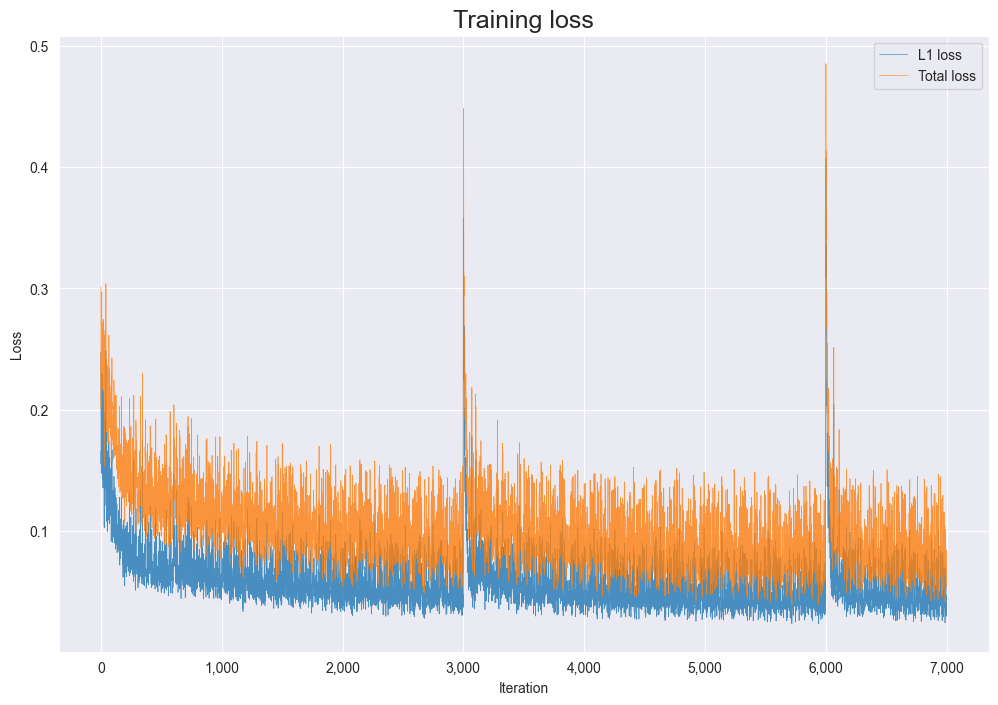

In [89]:
plot_folder = log_dir + '/eval/plots'
os.makedirs(plot_folder, exist_ok=True)

# plot training loss curves
sns.set_style("darkgrid")
sns.set_palette("tab10")
plt.figure(figsize=(12, 8))
plt.title('Training loss', fontsize=18)
plt.plot(df_train_metrics['train_loss_patches/l1_loss'], label='L1 loss', linewidth=0.5, alpha=0.8)
plt.plot(df_train_metrics['train_loss_patches/total_loss'], label='Total loss', linewidth=0.5, alpha=0.8)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

# after plotting the data, format the labels
current_values_x = plt.gca().get_xticks()

# using format string '{:.0f}' here but you can choose others
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values_x])

# export plot as png
plt.savefig(plot_folder + '/training_loss.png', bbox_inches='tight')

# plot curves
plt.show()

c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  


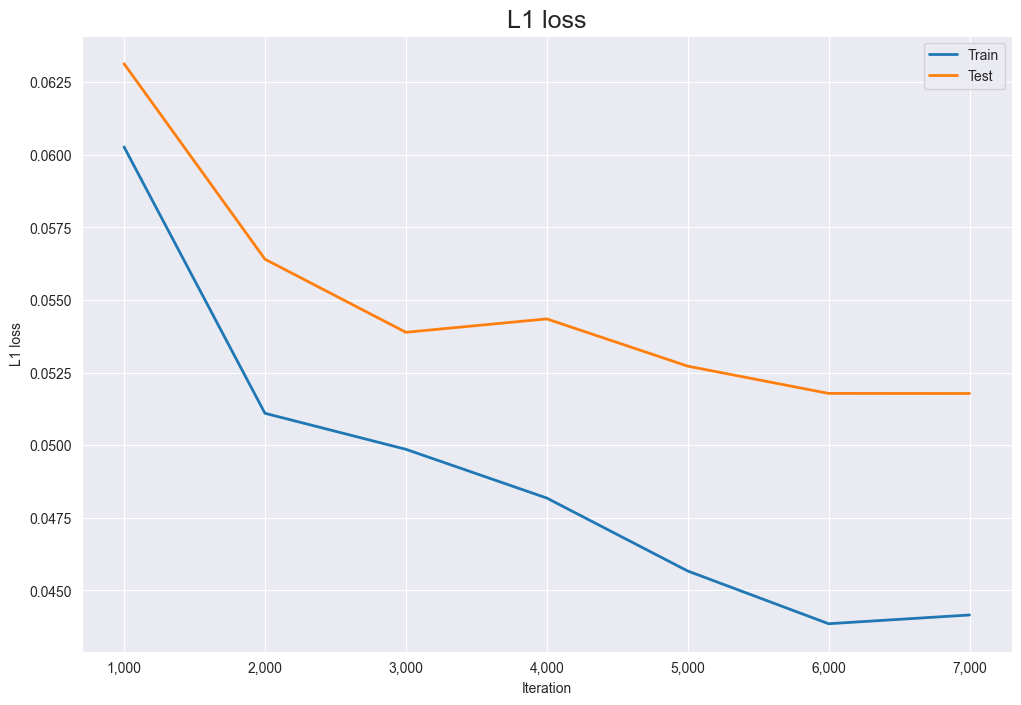

In [90]:
# plot L1 loss curves
sns.set_style("darkgrid")
sns.set_palette("tab10")
plt.figure(figsize=(12, 8))
plt.title('L1 loss', fontsize=18)
plt.plot(df_eval_metrics['train/loss_viewpoint - l1_loss'], label='Train', lw=2)
plt.plot(df_eval_metrics['test/loss_viewpoint - l1_loss'], label='Test', lw=2)
plt.xlabel('Iteration')
plt.ylabel('L1 loss')
plt.legend()

# after plotting the data, format the labels
current_values_x = plt.gca().get_xticks()

# using format string '{:.0f}' here but you can choose others
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values_x])

# export plot as png
plt.savefig(plot_folder + '/l1_loss.png', bbox_inches='tight')

# plot curves
plt.show()

c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  


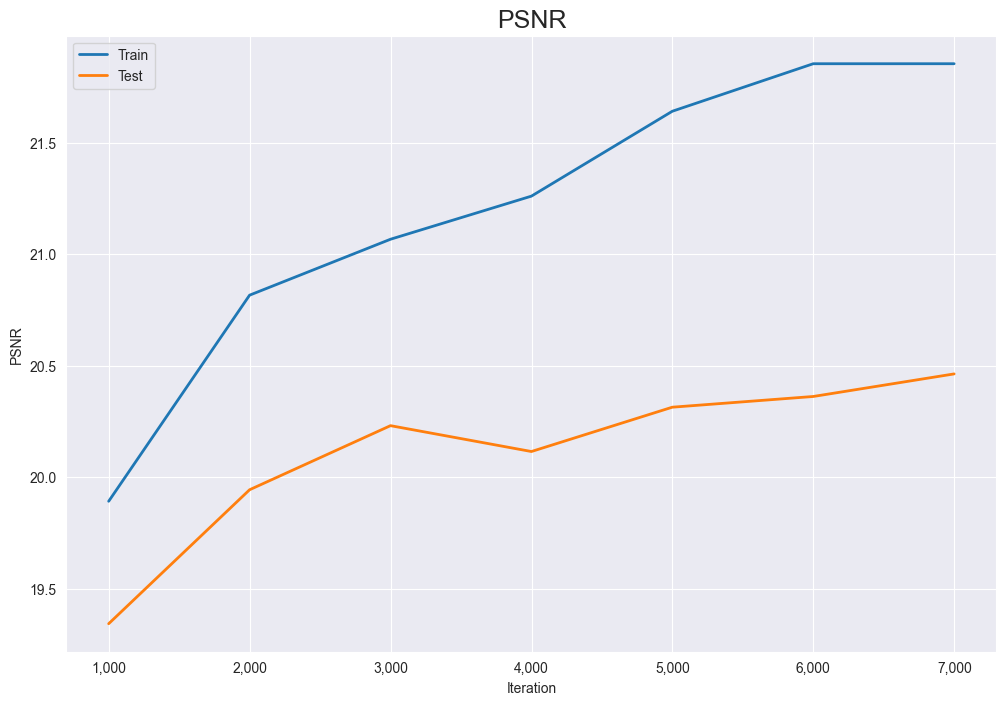

In [91]:
# plot psnr curves
sns.set_style("darkgrid")
sns.set_palette("tab10")
plt.figure(figsize=(12, 8))
plt.title('PSNR', fontsize=18)
plt.plot(df_eval_metrics['train/loss_viewpoint - psnr'], label='Train', lw=2)
plt.plot(df_eval_metrics['test/loss_viewpoint - psnr'], label='Test', lw=2)
plt.xlabel('Iteration')
plt.ylabel('PSNR')
plt.legend()

# after plotting the data, format the labels
current_values_x = plt.gca().get_xticks()

# using format string '{:.0f}' here but you can choose others
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values_x])

# export plot as png
plt.savefig(plot_folder + '/psnr.png', bbox_inches='tight')

# plot curves
plt.show()

c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  


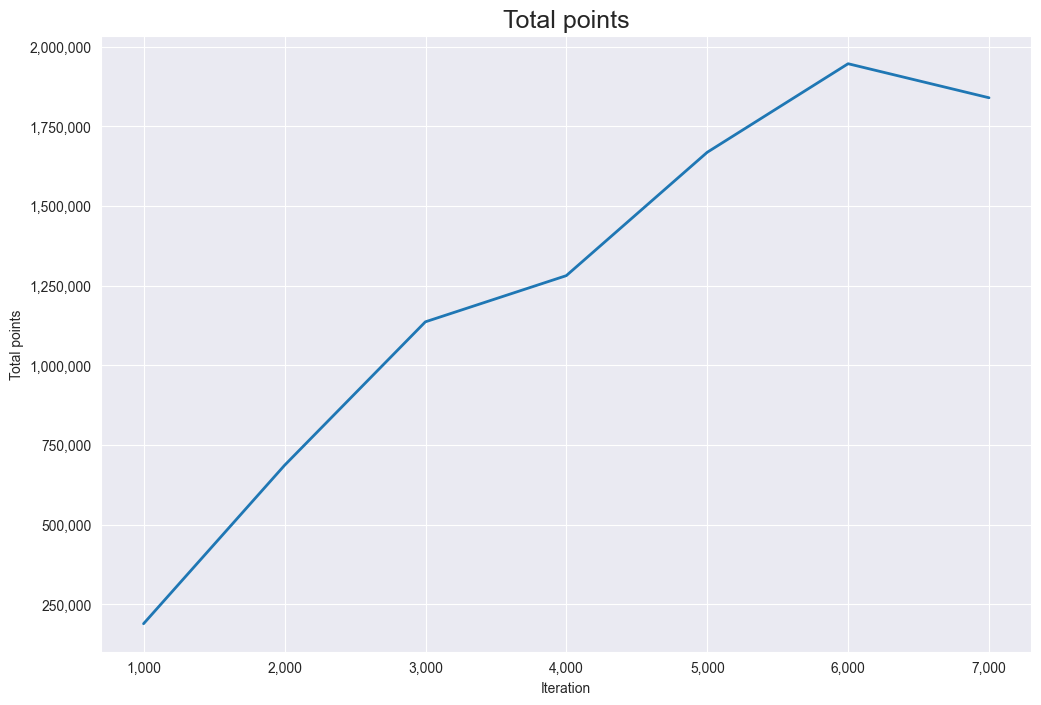

In [92]:
# plot total points
sns.set_style("darkgrid")
sns.set_palette("tab10")
plt.figure(figsize=(12, 8))
plt.title('Total points', fontsize=18)
plt.plot(df_eval_metrics['total_points'], lw=2)
plt.xlabel('Iteration')
plt.ylabel('Total points')

# after plotting the data, format the labels
current_values_x = plt.gca().get_xticks()
current_values_y = plt.gca().get_yticks()

# using format string '{:.0f}' here but you can choose others
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values_x])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values_y])

# export plot as png
plt.savefig(plot_folder + '/total_points.png', bbox_inches='tight')

# plot curves
plt.show()

In [93]:
df_hist = reader.histograms
df_hist.head()

,step,tag,counts,limits
0,1000,scene/opacity_histogram,"[0.0, 1.0, 0.0, 0.0, 4.0, 1.0, 5.0, 6.0, 11.0,...","[0.0017004692789644735, 0.001870516206860921, ..."
1,2000,scene/opacity_histogram,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 4.0, 1.0, ...","[0.0008726096153025355, 0.0009598705768327891,..."
2,3000,scene/opacity_histogram,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, ...","[0.0009598705768327891, 0.001055857634516068, ..."
3,4000,scene/opacity_histogram,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 5.0, ...","[0.001055857634516068, 0.001161443397967675, 0..."
4,5000,scene/opacity_histogram,"[0.0, 1.0, 1.0, 2.0, 0.0, 2.0, 2.0, 4.0, 5.0, ...","[0.0012775877377644426, 0.001405346511540887, ..."


c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\ipykernel_launcher.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator


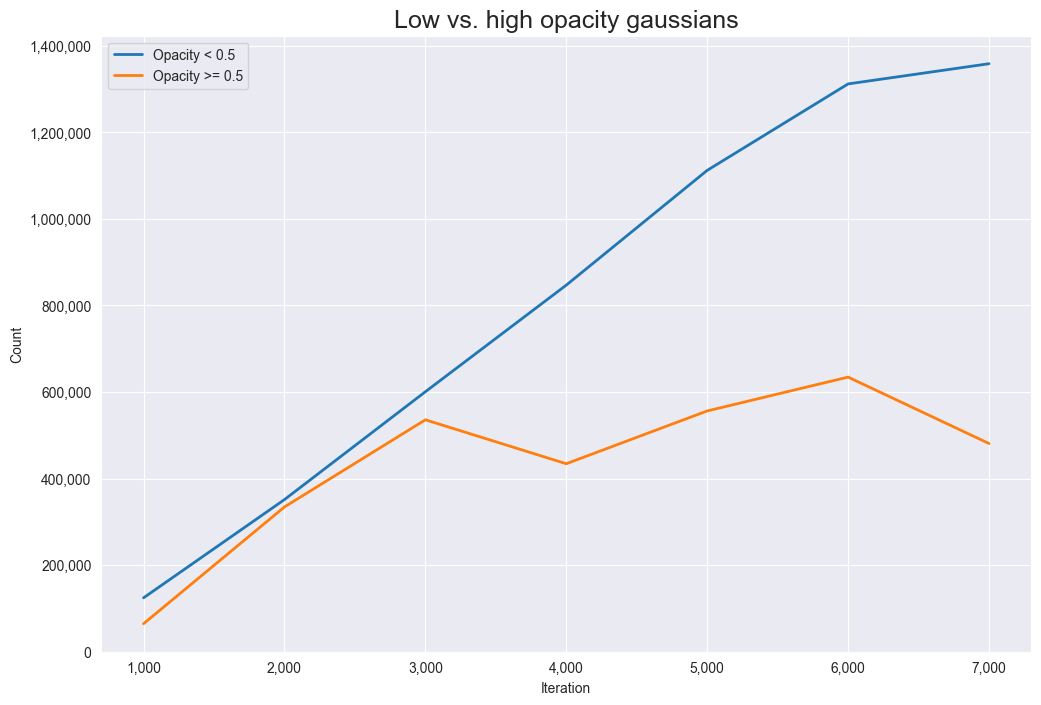

In [94]:
# Calculate total counts for limits < 0.5 and limits >= 0.5 for each step
df_hist['counts_less_than_0.5'] = df_hist.apply(lambda row: row['counts'][row['limits'] < 0.5].sum(), axis=1)
df_hist['counts_greater_than_or_equal_0.5'] = df_hist.apply(lambda row: row['counts'][row['limits'] >= 0.5].sum(), axis=1)

sns.set_style("darkgrid")
sns.set_palette("tab10")

# Initialize the figure
plt.figure(figsize=(12, 8))

# Plot counts for limits < 0.5
plt.plot(df_hist['step'], df_hist['counts_less_than_0.5'], label='Opacity < 0.5', lw=2)

# Plot counts for limits >= 0.5
plt.plot(df_hist['step'], df_hist['counts_greater_than_or_equal_0.5'], label='Opacity >= 0.5', lw=2)

# Add title and labels
plt.title('Low vs. high opacity gaussians', fontsize=18)
plt.xlabel('Iteration')
plt.ylabel('Count')

# Add legend
plt.legend()

# after plotting the data, format the labels
current_values_x = plt.gca().get_xticks()
current_values_y = plt.gca().get_yticks()

# using format string '{:.0f}' here but you can choose others
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values_x])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values_y])

# Export plot as png
plt.savefig(plot_folder + '/opacity_low_vs_high.png', bbox_inches='tight')

# Show the plot
plt.show()

c:\Users\di\anaconda3\envs\gaussian_splatting\lib\site-packages\ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


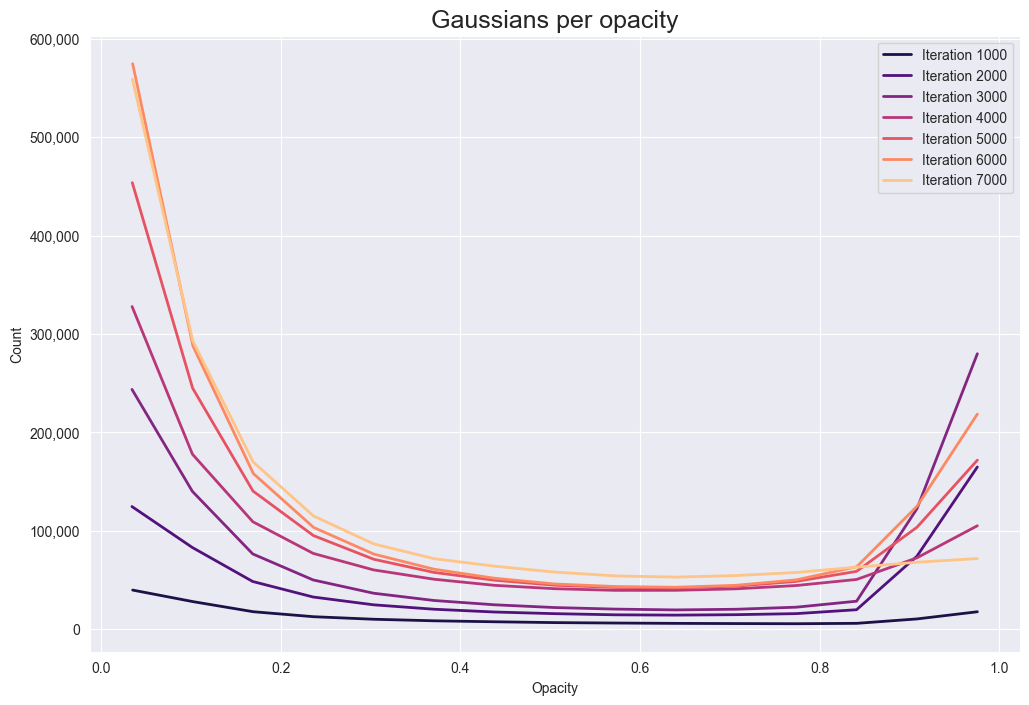

In [95]:
df_hist_reduced = df_hist[df_hist['step'] % 1000 == 0]

sns.set_style("darkgrid")
sns.set_palette("magma", 7)
plt.figure(figsize=(12, 8))

def plot_subplots(data, label):
  counts = data['counts'].iloc[0]
  limits = data['limits'].iloc[0]
  x, y = SummaryReader.histogram_to_bins(counts, limits, limits[0], limits[-1], 15)
  # Draw the densities in a few steps
  plt.plot(x, y, lw=2, label=label)

# Plot each histogram
for i, step in enumerate(df_hist_reduced['step']):
  plot_subplots(df_hist_reduced[df_hist_reduced['step'] == step], f'Iteration {step}')

plt.title('Gaussians per opacity', fontsize=18)
plt.xlabel('Opacity')
plt.ylabel('Count')
plt.legend()

# after plotting the data, format the labels
current_values_y = plt.gca().get_yticks()

# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values_y])

# export plot as png
plt.savefig(plot_folder + '/opacity_count.png', bbox_inches='tight')

# plot curves
plt.show()

In [96]:
df_img = reader.images
df_img.head()

,step,tag,value
0,1000,test_view_0049/render,"[[[192, 204, 211], [191, 202, 209], [190, 201,..."
1,2000,test_view_0049/render,"[[[186, 197, 202], [187, 198, 203], [187, 199,..."
2,3000,test_view_0049/render,"[[[185, 193, 197], [185, 193, 197], [185, 193,..."
3,4000,test_view_0049/render,"[[[169, 171, 172], [177, 181, 182], [186, 194,..."
4,5000,test_view_0049/render,"[[[183, 185, 186], [189, 190, 193], [193, 198,..."


In [97]:
render = [1, 5]
img_tags = df_img['tag'].unique()
render_tags = [img_tags[i] for i in render] # ['test_view_0161/render', 'test_view_0049/render']

In [98]:
for render_tag in render_tags:
    render_folder = log_dir + '/eval/' + render_tag
    os.makedirs(render_folder, exist_ok=True)
    counter = int(1)

    for i in df_img.index:
        if df_img.loc[i, 'tag'] != render_tag:
            continue

        image = df_img.loc[i, 'value']
        height, width, _ = image.shape
        plt.figure(figsize=(width/80, height/80), dpi=80)
        plt.imshow(image)
        plt.axis('off')
        plt.box(False)
        plt.savefig(render_folder + '/' + str(counter) + '.png', bbox_inches='tight', pad_inches=0, transparent=True, dpi=300)

        plt.close()

        counter += 1